In [28]:
import matplotlib.pyplot as plt
import numpy as np
import diagnostics as diag
import numpy.ma as ma
import tracemalloc
from iosubdomains import Variable

In [30]:
norot = diag.plume('../../data/Nyles/plume_nonrot/', 'plume_nonrot')
rot = diag.plume('../../data/Nyles/plume_rot/', 'plume_rot')
#exp = diag.plume('../../data/Nyles/plume_2days_pressure_4/', 'plume_2days_pressure_4')
time = norot.time/3600/24
r_lim = 0.35
z_lim = 0.6

We selected this parameters to be $r_{lim} = 0.35$ and $z_{lim} = 0.6$.

# Checking the energy reservoirs

We want the plume to be in static equilibrium with the environment, i.e. the energy reservoirs should remain fairly constant or not show any trend. 

So we compute the **APE** and the **K** reservoirs through time.

In [31]:
Ek_norot = norot.Volume_integral('KE', r_lim, z_lim)
Ea_norot = norot.Volume_integral('APE', r_lim, z_lim)

Ek_rot = rot.Volume_integral('KE', r_lim, z_lim)
Ea_rot = rot.Volume_integral('APE', r_lim, z_lim)
#Ep = exp.Volume_integral('Ep', r_lim, z_lim)

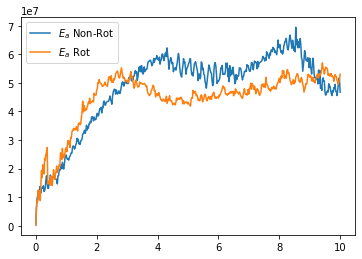

In [32]:
plt.plot(time, Ea_norot, label='$E_a$ Non-Rot')
plt.plot(time, Ea_rot, label='$E_a$ Rot')
plt.legend()
plt.savefig('../../stage_M2/LES/figs/Ea_rot_nonrot')

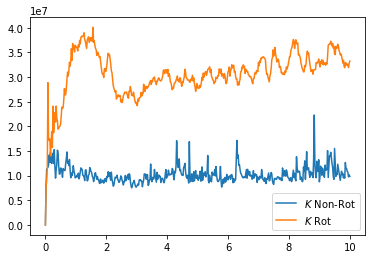

In [33]:
plt.plot(time, Ek_norot, label='$K$ Non-Rot')
plt.plot(time, Ek_rot, label='$K$ Rot')
plt.legend()
plt.savefig('../../stage_M2/LES/figs/Ek_rot_nonrot')

In [1]:
plt.rcParams.update({'font.size': 13})
plt.plot(time, Ea_rot, label='$E_a$ rot')
plt.plot(time, Ek_rot, label='$K$ rot')
#plt.axvline(4, ls='--')
plt.legend(shadow=True, fontsize=13)
plt.grid()
plt.xlabel('Days')
plt.ylabel(r'Energy density [$L^2 T^{-3}$]')
plt.savefig('../../stage_M2/LES/figs/Ea_Ek_rot', facecolor=(1,0,0,0), bbox_inches='tight', dpi=100)

NameError: name 'plt' is not defined

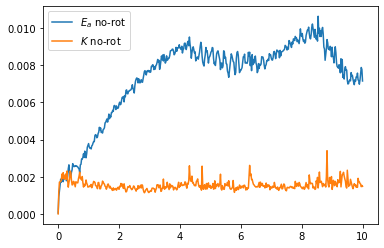

In [8]:
plt.plot(time, Ea_norot, label='$E_a$ no-rot')
plt.plot(time, Ek_norot, label='$K$ no-rot')
plt.legend()
plt.savefig('../../Desktop/figs_plume/Ea_Ek_nonrot')

We see that the $K$ it reaches equilibrium pretty quick, but $E_a$ takes 4 days to reach its equilibrium state. There is some fluctuations but we can see that it oscilates around a value of 0.007 (units?).

For $E_b$, we see that the order of magnitud in which $E_b$ variets is neglectable, so we can assume that it is constant. In reality we don't care about $E_b$.

In [9]:
Eb = Ep - Ea

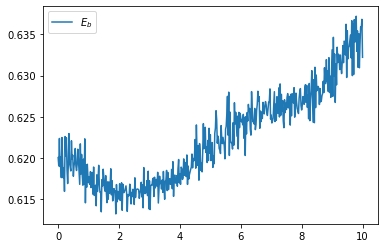

In [10]:
plt.plot(time, Eb, label='$E_b$')
plt.legend()

In [17]:
heat_content_rot = rot.Volume_integral('b', r_lim, z_lim)
heat_content_norot = norot.Volume_integral('b', r_lim, z_lim)

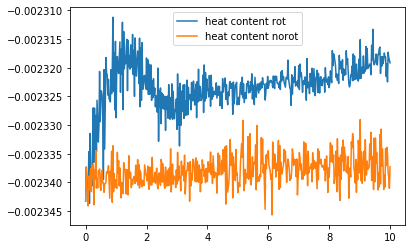

In [19]:
plt.plot(time, heat_content_rot, label='heat content rot')
plt.plot(time, heat_content_norot, label='heat content norot')
plt.legend()
plt.savefig('../../Desktop/figs_plume/heat_content')
#plt.ylim(-0.00204, -0.002015)

If we integrate the $b$ in the control volume we see how it doesn't any trend, it oscilates around a mean value. This confirms that on average the heat content remains constant in the long time.

In [13]:
rot.template

'../../data/Nyles/plume_rot/plume_rot_%02i_hist.nc'

In [26]:
b = Variable(rot.template, 'b')
br = b[:,:,0,0]
norot.params['dz']

62.5

In [27]:
np.diff(br)/norot.params['dz']

array([[5.00000000e-06, 5.00000000e-06, 5.00000000e-06, ...,
        5.00000000e-06, 5.00000000e-06, 5.00000000e-06],
       [5.01139757e-06, 5.01014482e-06, 5.00838467e-06, ...,
        4.99855837e-06, 4.99953078e-06, 4.99977432e-06],
       [5.12209811e-06, 5.10104842e-06, 5.07180927e-06, ...,
        5.00400449e-06, 5.00202966e-06, 5.00055498e-06],
       ...,
       [1.00412553e-05, 1.29823481e-05, 7.03841784e-06, ...,
        5.21856985e-06, 5.03379189e-06, 5.00255502e-06],
       [8.52534865e-06, 1.30624233e-05, 8.08776973e-06, ...,
        4.84116995e-06, 4.95320225e-06, 4.98860449e-06],
       [6.90053262e-06, 1.34646779e-05, 9.09603281e-06, ...,
        4.88735407e-06, 5.00236012e-06, 5.00310841e-06]])

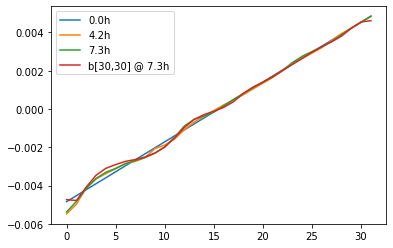

In [16]:
plt.plot(br[0], label=f'{time[0]:0.1f}h')
plt.plot(br[200], label=f'{time[200]:0.1f}h')
plt.plot(br[350], label=f'{time[350]:0.1f}h')
#plt.plot(b[100,:,31,31])
plt.plot(b[350,:,30,30], label=f'b[30,30] @ {time[350]:0.1f}h')
plt.legend()
plt.savefig('../../Desktop/figs_plume/b_profiles_rot')

In [19]:
ϕ_b2 = rot.buoyancy_forcing()

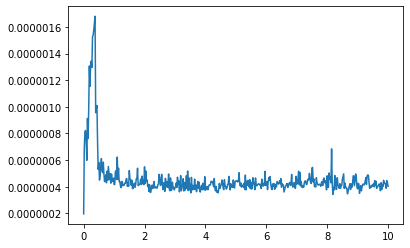

In [20]:
plt.plot(time, ϕ_b2)

In [7]:
lat_35 = norot.Lateral_flux('none', 0.35, 0.55)

In [10]:
lat_40 = norot.Lateral_flux('none', 0.40, 0.55)

In [13]:
lat_45 = norot.Lateral_flux('none', 0.45, 0.55)

In [22]:
lat_35.mean()

0.003148491811433875

In [9]:
lat_35.std()

0.014496281864667619

In [23]:
lat_40.mean()

0.0022682073666393013

In [11]:
lat_40.std()

0.013372739250858526

In [14]:
lat_45.std()

0.011197215534826966

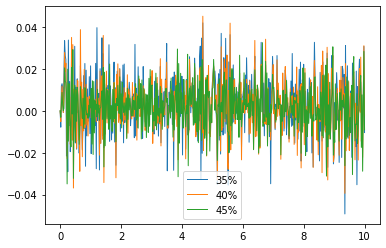

In [21]:
plt.plot(time, lat_35, label='35%', lw=1)
plt.plot(time, lat_40, label='40%', lw=1)
plt.plot(time, lat_45, label='45%', lw=1)
plt.legend()

# Energy fluxes

![schematic](energy_budget_plume.png)

In [17]:
ϕ_E1 = exp.Lateral_flux('br_times_z', r_lim, z_lim)

In [18]:
ϕ_E2 = exp.Volume_integral('Q_times_z', r_lim, z_lim)

In [19]:
ϕ_E3 = exp.Lateral_flux('pr', r_lim, z_lim)

In [20]:
ϕ_E = ϕ_E1 + ϕ_E2 + ϕ_E3

Text(0.5, 0, 'Days')

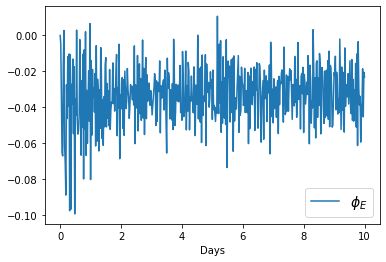

In [21]:
#plt.plot(time, ϕ_E1, label='$\phi_{E_1}$')
#plt.plot(time, ϕ_E2, label='$\phi_{E_2}$')
#plt.plot(time, ϕ_E3, label='$\phi_{E_3}$')
plt.plot(time, ϕ_E, label='$\phi_{E}$')
plt.legend(fontsize=14)
plt.xlabel('Days')

In [25]:
KE_flux = rot.Surface_flux('KE', r_lim, z_lim)

In [28]:
ϕ_z = rot.Volume_integral('phi_z', r_lim, z_lim)

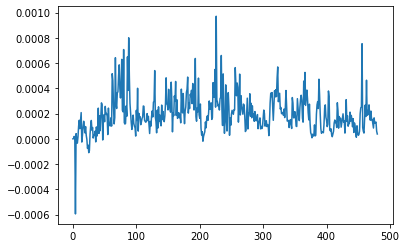

In [30]:
plt.plot(KE_flux)
#plt.plot(ϕ_z)

In [27]:
KE_flux - ϕ_z

NameError: name 'φ_z' is not defined

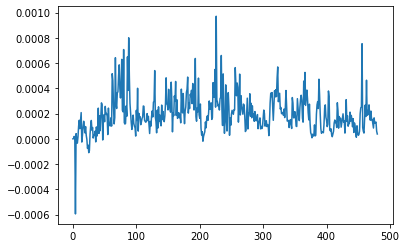

In [26]:
plt.plot(KE_flux)

## comparison between $\phi_{E_3}$ and $\phi_p = \overline{w'p'}$

In [21]:
ϕ_p = rot.Lid_flux('pr', r_lim, z_lim)

In [23]:
total_pr_flux = rot.Surface_flux('pr', r_lim, z_lim)

Text(0.5, 0, 'Days')

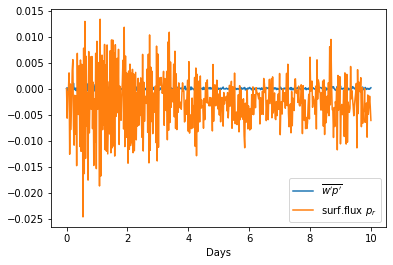

In [24]:
plt.plot(time, ϕ_p, label="$\overline{w'p'}$")
#plt.plot(time, ϕ_E3, label="$\phi_{E_3}$")
plt.plot(time, total_pr_flux, label="surf.flux $p_r$")
plt.legend()
plt.xlabel('Days')

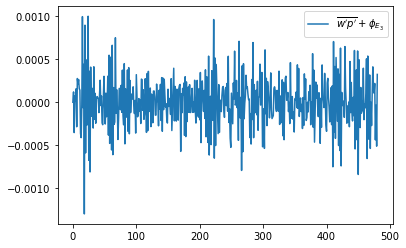

In [34]:
plt.plot(ϕ_p, label="$\overline{w'p'} + \phi_{E_3}$")
#plt.plot(total_pr_flux, label="surf.flux $p_r$")
plt.legend()

## buoyancy_forcing 

In [26]:
ϕ_b2 = exp.buoyancy_forcing()

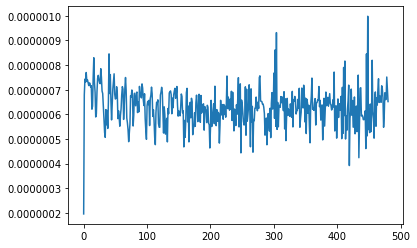

In [27]:
plt.plot(ϕ_b2)

## Buoyancy flux

In [28]:
ϕ_z = exp.Volume_integral('phi_z', r_lim, z_lim)

In [50]:
ϵ_k = ϕ_z[1:] - ϕ_p[1:] - np.diff(Ek)
ϵ_k2 = ϕ_z[1:] - ϕ_p[1:] 

ϵ_a = ϕ_b2[1:]  - ϕ_z[1:]  - np.diff(Ea)
ϵ_a2 = ϕ_b2[1:]  - ϕ_z[1:]

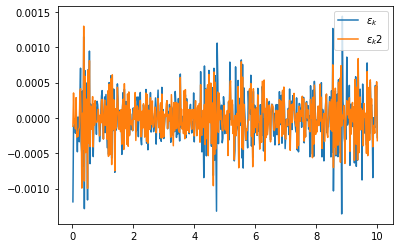

In [49]:
plt.plot(time[1:], ϵ_k, label='$\epsilon_k$')
plt.plot(time[1:], ϵ_k2, label='$\epsilon_k2$')
#plt.plot(time, ϵ_a, label='$\epsilon_a$')
plt.legend()

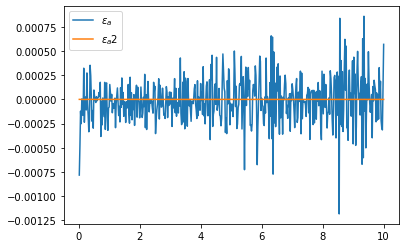

In [52]:
plt.plot(time[1:], ϵ_a, label='$\epsilon_a$')
plt.plot(time[1:], ϵ_a2, label='$\epsilon_a2$')
plt.legend()

In [53]:
ε = ϵ_a/(ϵ_k + ϵ_a)

In [87]:
def mixing_efficiency(ϕb, ϕz, ϕp):
    return (ϕb - ϕz)/(ϕb - ϕp)

In [54]:
ε2 = (ϕ_b2 - ϕ_z)/(ϕ_b2 - ϕ_p)

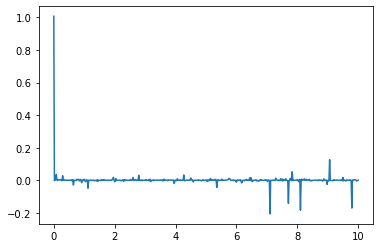

In [57]:
#plt.plot(time[1:], ε)
plt.plot(time, ε2)